ejercicio 1
Atenúa el ruido en la imagen ruido.jpg tal cual se ve en el ejemplo con python y jupiter 


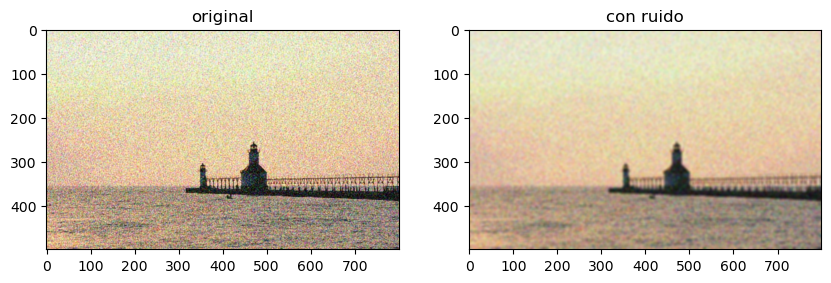

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread('ruido.jpg')

denoised_image = cv2.GaussianBlur(image, (9, 9), 3)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('original')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1,2,2)
plt.title('con ruido')
plt.imshow(cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB))

plt.show()

ejercicio 2


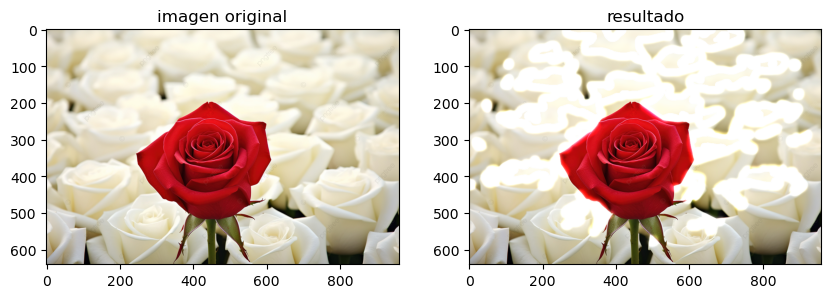

In [33]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


image = cv2.imread('rosa.png')

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


_, mask = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)

kernel = np.ones((5,5), np.uint8)
mask = cv2.dilate(mask, kernel, iterations=1)
mask = cv2.erode(mask, kernel, iterations=1)

mask = cv2.GaussianBlur(mask, (21, 21), 0)

mask_inv = cv2.bitwise_not(mask)

rose_foreground = cv2.bitwise_and(image_rgb, image_rgb, mask=mask)
background = cv2.bitwise_and(image_rgb, image_rgb, mask=mask_inv)

background_blurred = cv2.GaussianBlur(background, (21, 21), 0)

result = cv2.add(rose_foreground, background_blurred)

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.title('imagen original')
plt.imshow(image_rgb)

plt.subplot(1, 2, 2)
plt.title('resultado')
plt.imshow(result)

plt.show()


ejercicio 3


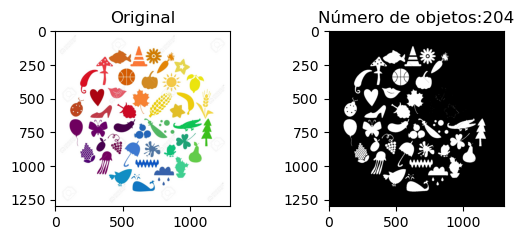

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img=cv2.imread('elementos.jpg')

gris = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
_, binarizada =cv2.threshold(gris, 128,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
borde, _=cv2.findContours(binarizada, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cont =len(borde)

plt.figure(figsize=(10, 5))

plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original")

plt.subplot(2, 3, 2)
plt.title(f'Número de objetos:{cont}')
plt.imshow(cv2.cvtColor(binarizada, cv2.COLOR_BGR2RGB))

plt.show()

ejercicio 4

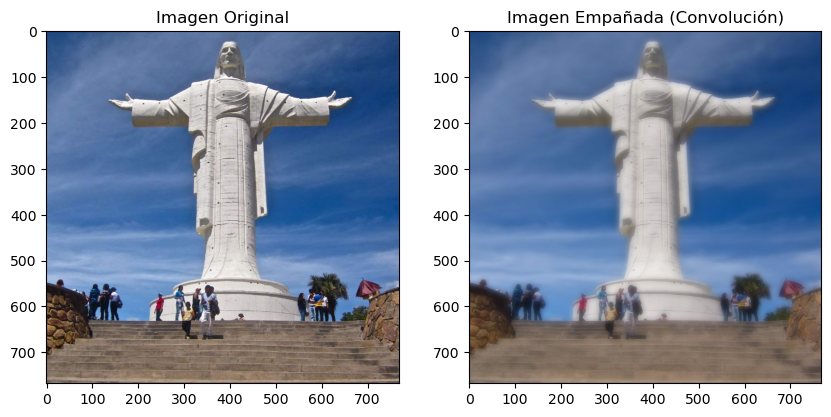

In [22]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


imagen_original = cv2.imread('cristo.jpg')
imagen_original = cv2.cvtColor(imagen_original, cv2.COLOR_BGR2RGB)

imagen_empañada = cv2.GaussianBlur(imagen_original, (41, 41), 0)

img_fin = (imagen_original * 0.3 + imagen_empañada * 0.7).astype(np.uint8)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Imagen Original')
plt.imshow(imagen_original)

plt.subplot(1, 2, 2)
plt.title('Imagen Empañada (Convolución)')
plt.imshow(img_fin)

plt.show()
